In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("diabetes_for_test.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

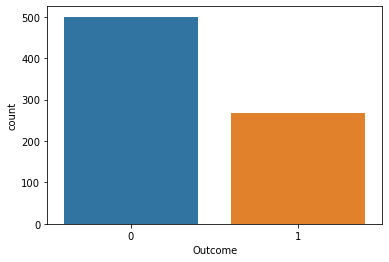

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Outcome', data=df)

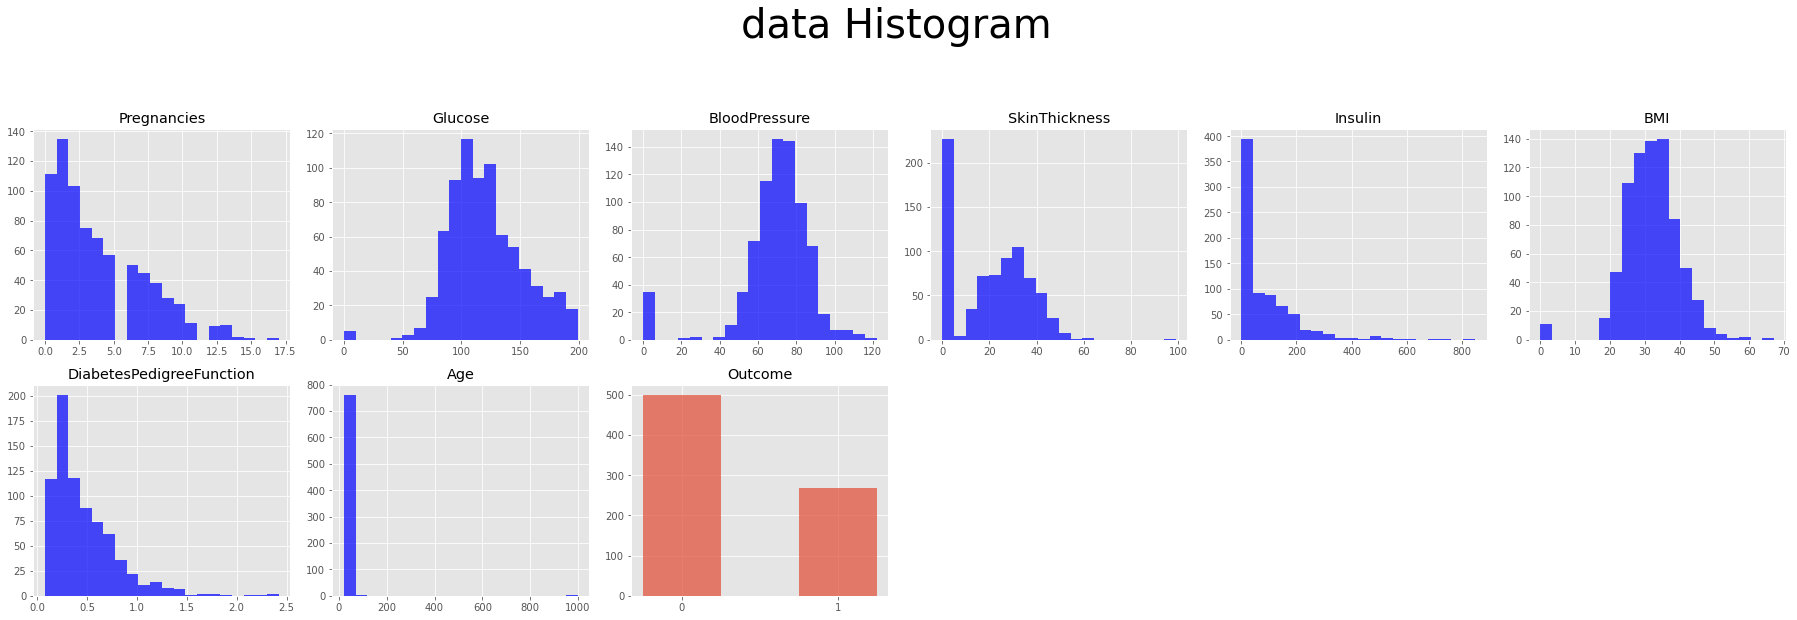

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(25,20))
plt.suptitle("data Histogram", fontsize=40)

cols=df.columns
for i in range(len(cols)):
    plt.subplot(5,6,i+1)
    plt.title(cols[i])
    if len(df[cols[i]].unique())>10:
        plt.hist(df[cols[i]], bins=20, color='b', alpha=0.7)
        
    else:
        temp=df[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<AxesSubplot:>

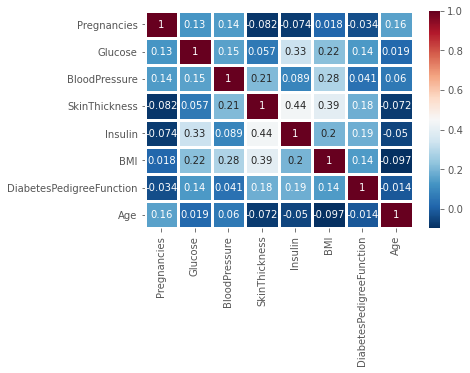

In [5]:
df_cor=df.drop(columns='Outcome').corr(method='pearson')
sns.heatmap(df_cor, cmap='RdBu_r', annot=True, linewidth=3)

다중공선성은 없다고 판단

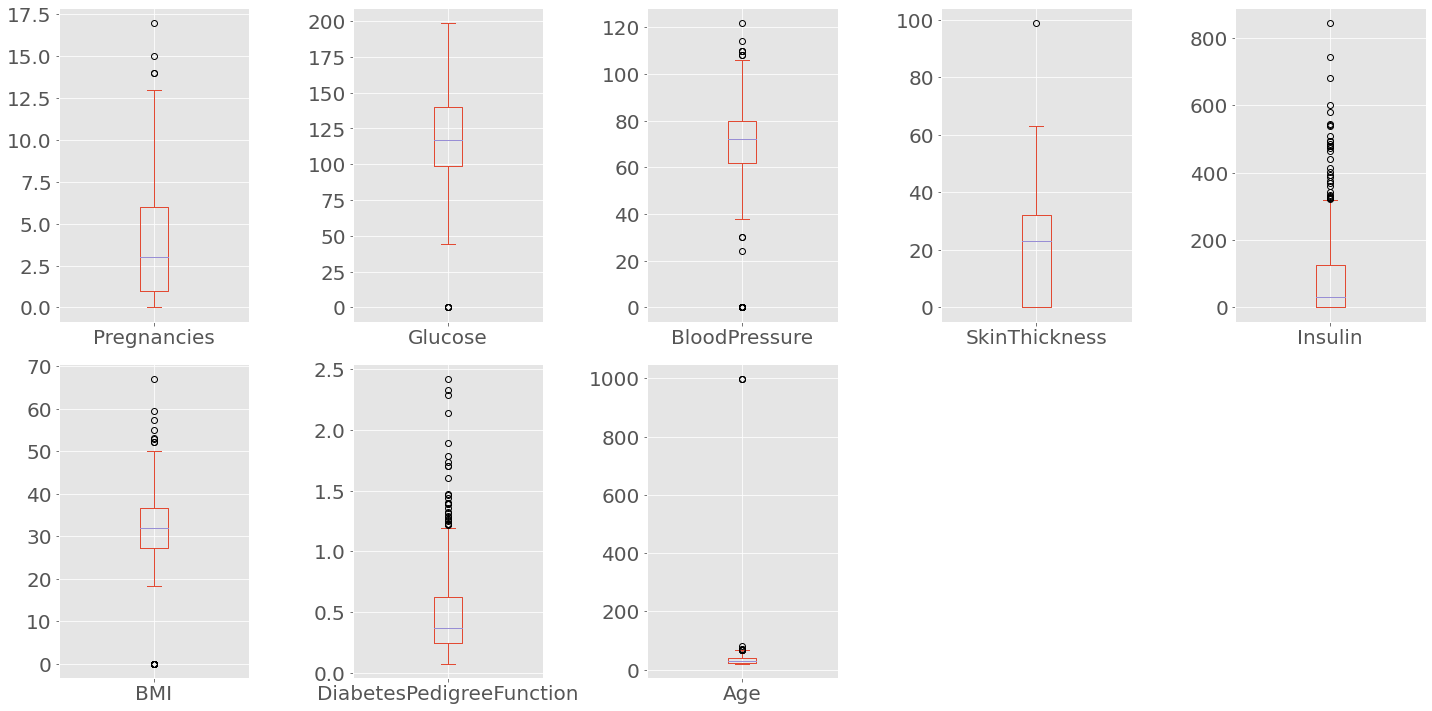

In [6]:
df.drop(columns='Outcome').plot(kind='box', subplots=True, layout=(2,5), figsize=(20,10), fontsize=20)
plt.tight_layout()
plt.show()

- 이상치 대체

In [8]:
index=df[df['Age']>400].index
df.loc[index, 'Age']=df['Age'].median()

C:\Users\taeeu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

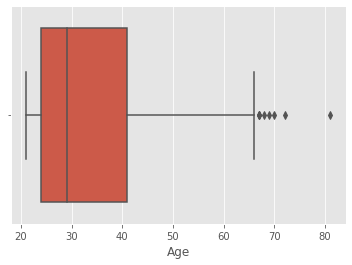

In [9]:
sns.boxplot(df['Age'])

In [10]:
index2=df[df['Glucose']==0].index
df.loc[index2, 'Glucose']=df['Glucose'].median()
index3=df[df['BloodPressure']==0].index
df.loc[index3, 'BloodPressure']=df['BloodPressure'].median()

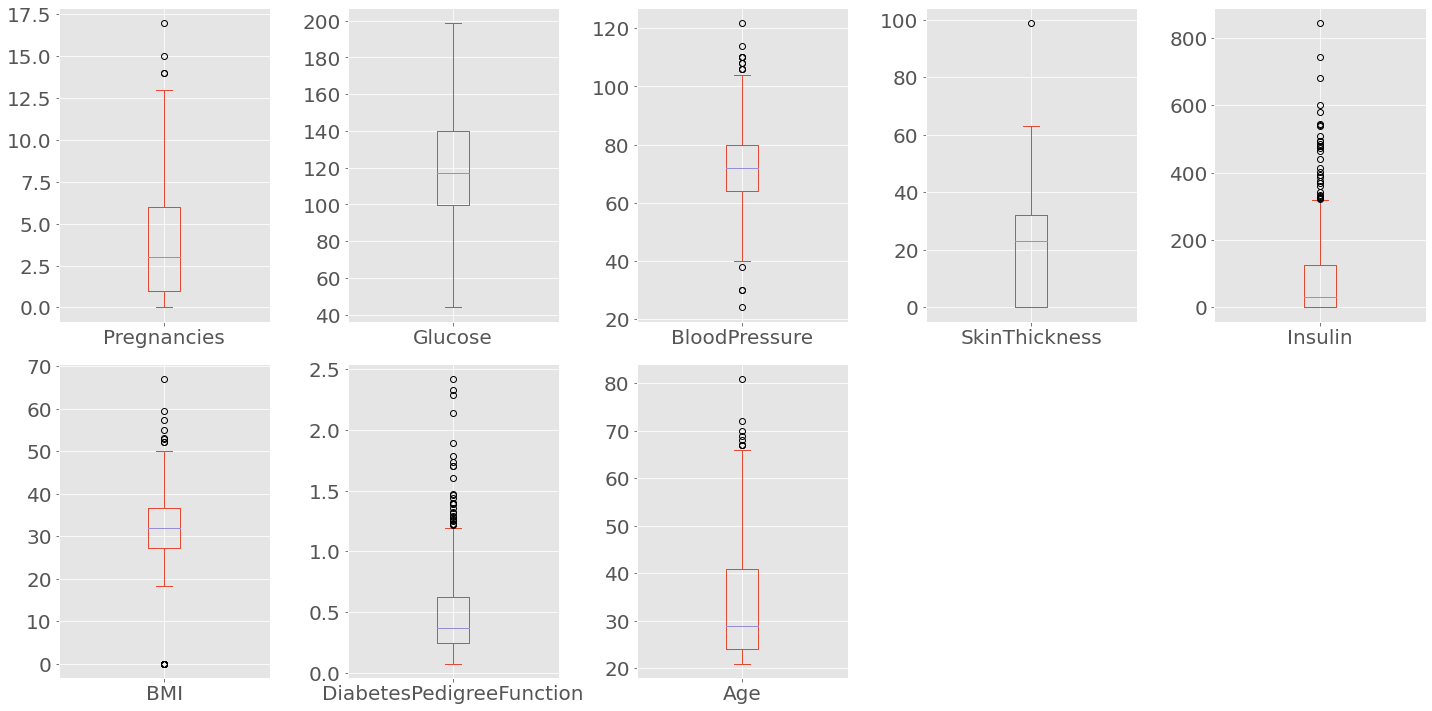

In [11]:
df.drop(columns='Outcome').plot(kind='box', subplots=True, layout=(2,5), figsize=(20,10), fontsize=20)
plt.tight_layout()
plt.show()

In [12]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
X=df.drop(columns=['Outcome'])
y=df[['Outcome']]

In [13]:
ros=RandomOverSampler()
X_upsampling, y_upsampling=ros.fit_resample(X, y)

In [16]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import sklearn.svm as svm

log=LogisticRegression()
xgb=XGBClassifier(random_state=0)
svm_clf=svm.SVC(kernel='linear')

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import time
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)

kfold=KFold()
def model_result(model):
    pred_li=[]
    for train_index, test_index in kfold.split(X):
        X_train, X_test=X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test=y.iloc[train_index, :], y.iloc[test_index, :]
        
        X_train_resample, y_train_resample=smote.fit_resample(X_train, y_train)
        
        start=time.time()
        model.fit(X_train_resample, y_train_resample)
        end=time.time()
        
        pred=model.predict(X_test)
        pred_li.append(accuracy_score(pred, y_test['Outcome']))
    print(f'{end-start:.5f} sec')
    print(np.mean(pred_li))

In [29]:
model_result(log)

0.05079 sec
0.7514048043459807


In [30]:
model_result(xgb)

[17:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [31]:
model_result(svm_clf)

6.71241 sec
0.7605126899244546


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

smote=SMOTE(random_state=0)
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, test_size=0.3, random_state=2022)
scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
pca=PCA(n_components=8)
X_train_pca=pca.fit(X_train_s)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:5].sum())

[0.26110315 0.22613628 0.12025873 0.10650649 0.1016306  0.08197042
 0.05251497 0.04987936]
0.8156352463546328


In [35]:
def pca_model_result(model):
    pred_li=[]
    for train_index, test_index in kfold.split(X):
        X_train, X_test=X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test=y.iloc[train_index, :], y.iloc[test_index, :]
        
        X_train_resample, y_train_resample=smote.fit_resample(X_train, y_train)
        
        sclaer=StandardScaler()
        X_train_res_s=scaler.fit_transform(X_train_resample)
        X_test_s=scaler.transform(X_test)
        
        pca=PCA(n_components=5)
        X_train_pca=pca.fit_transform(X_train_res_s)
        X_test_pca=pca.transform(X_test_s)
        
        start=time.time()
        model.fit(X_train_pca, y_train_resample)
        end=time.time()
        
        pred=model.predict(X_test_pca)
        pred_li.append(accuracy_score(pred, y_test['Outcome']))
        
    print(f'{end - start:.5f} sec')
    print(np.mean(pred_li))

In [36]:
pca_model_result(log)

0.00936 sec
0.7279093455564045


In [37]:
pca_model_result(xgb)

[17:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [38]:
pca_model_result(svm_clf)

0.06789 sec
0.7253034547152193
